In [ ]:
!pip install tensorflow streamlit matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
!unzip '/content/drive/MyDrive/vegetable.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [ ]:
data_train_path='/content/Vegetable Images/train'
data_test_path='/content/Vegetable Images/test'
data_val_path='/content/Vegetable Images/validation'

In [ ]:
img_width=180
img_height=180

In [ ]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 15000 files belonging to 15 classes.


In [ ]:
data_cat=data_train.class_names
data_cat

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [ ]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 3000 files belonging to 15 classes.


In [ ]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 3000 files belonging to 15 classes.


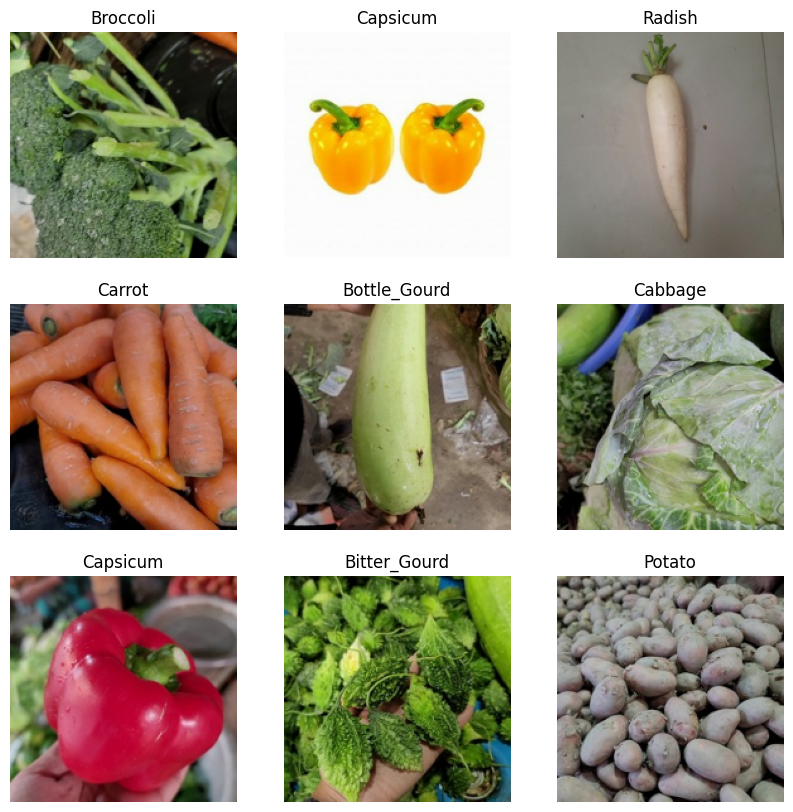

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

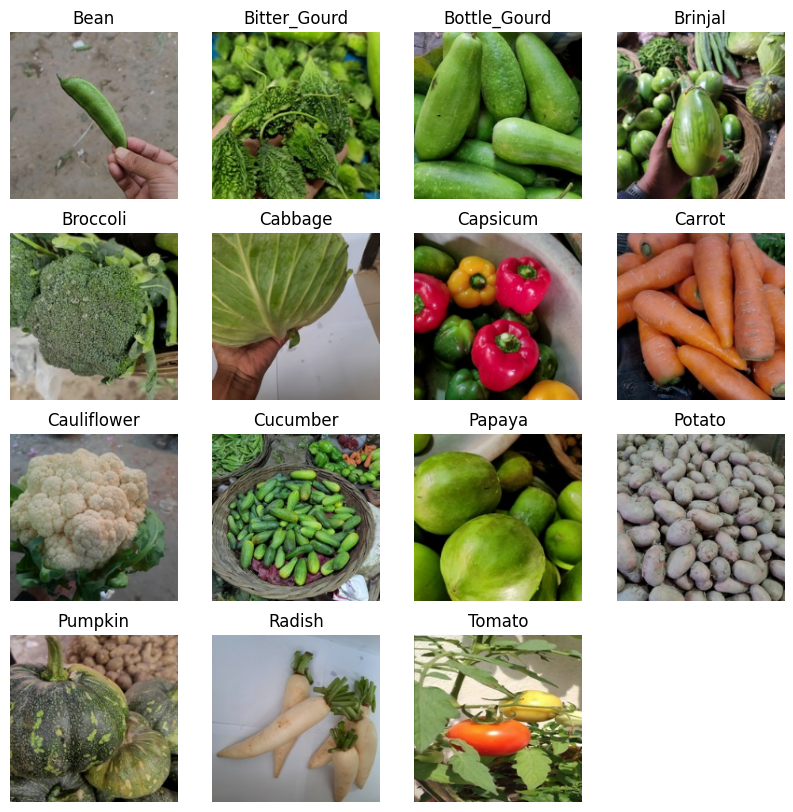

In [ ]:
import math

plt.figure(figsize=(10, 10))
num_classes = len(data_train.class_names)
rows = math.ceil(math.sqrt(num_classes))
cols = math.ceil(num_classes / rows)

# Keep track of how many images of each class have been displayed
class_counter = [0] * num_classes

for image_batch, label_batch in data_train:
    for image, label in zip(image_batch, label_batch):
        class_index = label.numpy()  # Get the label index as an integer
        if class_counter[class_index] < 1:  # Display only the first image of each class
            plt.subplot(rows, cols, class_index + 1)  # Adjust subplot index
            plt.imshow(image.numpy().astype('uint8'))
            plt.title(data_train.class_names[class_index])
            plt.axis("off")
            class_counter[class_index] += 1  # Increment class counter
    if all(count > 0 for count in class_counter):
        break  # Break the loop if images from all classes are displayed
plt.show()

In [ ]:
print(data_train)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 25
# history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)
history = model.fit(data_train,
                    epochs=epochs_size,
                    validation_data=data_val)

Epoch 1/25
469/469 [==============================] - 530s 1s/step - loss: 1.0420 - accuracy: 0.6745 - val_loss: 0.4914 - val_accuracy: 0.8550
Epoch 2/25
469/469 [==============================] - 522s 1s/step - loss: 0.3758 - accuracy: 0.8852 - val_loss: 0.3251 - val_accuracy: 0.9040
Epoch 3/25
469/469 [==============================] - 501s 1s/step - loss: 0.2117 - accuracy: 0.9363 - val_loss: 0.3073 - val_accuracy: 0.9123
Epoch 4/25
469/469 [==============================] - 502s 1s/step - loss: 0.1418 - accuracy: 0.9554 - val_loss: 0.2502 - val_accuracy: 0.9343
Epoch 5/25
469/469 [==============================] - 492s 1s/step - loss: 0.0836 - accuracy: 0.9724 - val_loss: 0.3250 - val_accuracy: 0.9143
Epoch 6/25
469/469 [==============================] - 481s 1s/step - loss: 0.0807 - accuracy: 0.9739 - val_loss: 0.3219 - val_accuracy: 0.9277
Epoch 7/25
469/469 [==============================] - 493s 1s/step - loss: 0.0769 - accuracy: 0.9751 - val_loss: 0.3057 - val_accuracy: 0.9280

Text(0.5, 1.0, 'Loss')

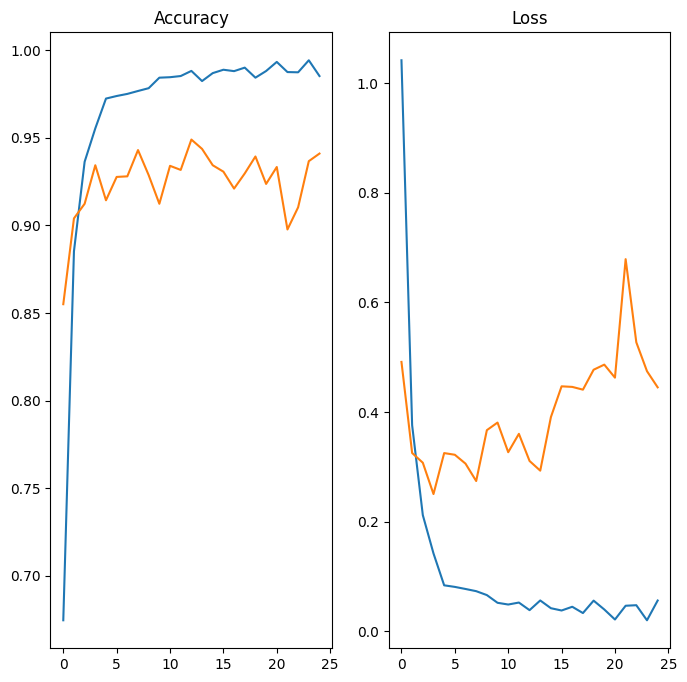

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [ ]:
image = '/content/Vegetable Images/validation/Radish/1205.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

1/1 [==============================] - 0s 48ms/step
Veg/Fruit in image is Radish with accuracy of 100.00


In [ ]:
model.save('Image_classify.keras')

In [ ]:
image = '/content/try2.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

1/1 [==============================] - 0s 33ms/step
Veg/Fruit in image is Cauliflower with accuracy of 83.12


In [ ]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(data_val)

print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy*100:.2f}%')


94/94 [==============================] - 31s 325ms/step - loss: 0.4450 - accuracy: 0.9410
Validation Loss: 0.4450
Validation Accuracy: 94.10%


In [ ]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(data_test)

print(f'test Loss: {loss:.4f}')
print(f'test Accuracy: {accuracy*100:.2f}%')


94/94 [==============================] - 30s 315ms/step - loss: 0.4043 - accuracy: 0.9387
test Loss: 0.4043
test Accuracy: 93.87%


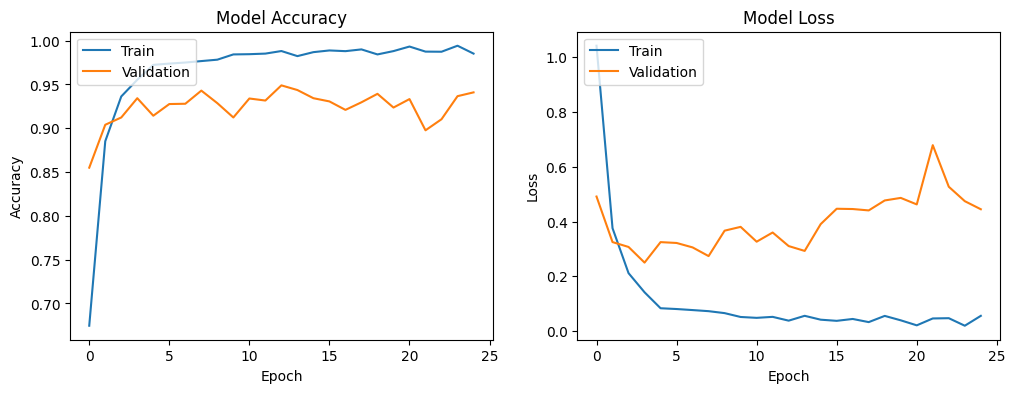

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
